In [1]:
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\WIN10\anaconda3\envs\nlp_py38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\WIN10\anaconda3\envs\nlp_py38\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\WIN10\anaconda3\envs\nlp_py38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### 1. 데이터 불러오기

In [3]:
data = pd.read_csv('./data/okt_final_data.csv')
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('Unnamed: 0.1', axis=1)
data

,영화,리뷰,평점,site,okt_review,okt_details,okt_polarity
0,명량,여기에 말같잖은 평다는 놈들은 매국노 인증인 듯,10.0,naver,"[('여기', 'Noun'), ('에', 'Josa'), ('말', 'Noun'),...","[[3, [('같잖다', 'Adjective')], -1.0], [3, [('같잖다...",-3.0
1,명량,다 좋았어요 한산보고 나서 보니 더 좋네요,10.0,naver,"[('다', 'Adverb'), ('좋다', 'Adjective'), ('한산', ...","[[1, [('좋다', 'Adjective')], 2.0], [1, [('좋다', ...",7.0
2,명량,2번째 본 역사영화 진짜 이순신은 대단한 영웅 중에 영웅보는 내내 끝까지 긴장 놓을...,10.0,naver,"[('2', 'Number'), ('번째', 'Suffix'), ('보다', 'Ve...","[[2, [('보다', 'Verb')], 1.0], [7, [('대단하다', 'Ad...",11.0
3,명량,정말 거짓말 안 한다클레멘타인에 대한 평가를 호평으로 오해했으면 관객 수가 이리 나...,1.0,naver,"[('정말', 'Noun'), ('거짓말', 'Noun'), ('안', 'Noun'...","[[11, [('오해', 'Noun'), ('하다', 'Verb')], -1.0],...",-1.0
4,명량,재미있게 잘 봤습니다,10.0,naver,"[('재미있다', 'Adjective'), ('자다', 'Verb'), ('보다',...","[[0, [('재미있다', 'Adjective')], 2.0], [0, [('재미있...",2.0
...,...,...,...,...,...,...,...
103569,완득이,세상에 수호천사는 없다,2.0,watcha,"[('세상', 'Noun'), ('에', 'Josa'), ('수호천사', 'Noun...","[[2, [('수호천사', 'Noun')], 1.0], [4, [('없다', 'Ad...",0.0
103570,완득이,도대체 유아인은 영화를 찍는지,1.0,watcha,"[('도대체', 'Noun'), ('유아인', 'Noun'), ('은', 'Josa...",[],0.0
103571,완득이,나도 멘토가 있었다면,6.0,watcha,"[('나다', 'Verb'), ('멘토', 'Noun'), ('가', 'Josa')...",[],0.0
103572,완득이,가장 이상적인 한국형 성장드라마,7.0,watcha,"[('가장', 'Noun'), ('이상', 'Noun'), ('적', 'Suffix...",[],0.0


In [4]:
label = []
for i in data['okt_polarity']:
    if i > 0:      
        i = 1      # 긍정
    elif i < 0:
        i = 0      # 부정
    else:
        i = NaN    # 중립
    label.append(i)
label

[0,
 1,
 1,
 0,
 1,
 nan,
 0,
 0,
 0,
 1,
 0,
 nan,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 nan,
 nan,
 1,
 0,
 1,
 1,
 0,
 0,
 nan,
 0,
 1,
 1,
 1,
 1,
 0,
 nan,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 nan,
 nan,
 0,
 1,
 1,
 nan,
 1,
 nan,
 1,
 0,
 1,
 nan,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 nan,
 1,
 nan,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 nan,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 nan,
 nan,
 1,
 1,
 1,
 1,
 nan,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 nan,
 1,
 1,
 1,
 nan,
 1,
 0,
 0,
 1,
 0,
 1,
 nan,
 nan,
 nan,
 0,
 nan,
 1,
 nan,
 nan,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 nan,
 nan,
 1,
 nan,
 0,
 nan,
 1,
 1,
 nan,
 1,
 1,
 1,
 nan,
 nan,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 nan,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 nan,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 nan,
 0,
 0,
 1,
 1,
 nan,
 nan,
 1,
 1,
 nan,
 1,
 1,
 1,
 1,
 nan,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1

In [6]:
data['label'] = label
data

,영화,리뷰,평점,site,okt_review,okt_details,okt_polarity,label
0,명량,여기에 말같잖은 평다는 놈들은 매국노 인증인 듯,10.0,naver,"[('여기', 'Noun'), ('에', 'Josa'), ('말', 'Noun'),...","[[3, [('같잖다', 'Adjective')], -1.0], [3, [('같잖다...",-3.0,0.0
1,명량,다 좋았어요 한산보고 나서 보니 더 좋네요,10.0,naver,"[('다', 'Adverb'), ('좋다', 'Adjective'), ('한산', ...","[[1, [('좋다', 'Adjective')], 2.0], [1, [('좋다', ...",7.0,1.0
2,명량,2번째 본 역사영화 진짜 이순신은 대단한 영웅 중에 영웅보는 내내 끝까지 긴장 놓을...,10.0,naver,"[('2', 'Number'), ('번째', 'Suffix'), ('보다', 'Ve...","[[2, [('보다', 'Verb')], 1.0], [7, [('대단하다', 'Ad...",11.0,1.0
3,명량,정말 거짓말 안 한다클레멘타인에 대한 평가를 호평으로 오해했으면 관객 수가 이리 나...,1.0,naver,"[('정말', 'Noun'), ('거짓말', 'Noun'), ('안', 'Noun'...","[[11, [('오해', 'Noun'), ('하다', 'Verb')], -1.0],...",-1.0,0.0
4,명량,재미있게 잘 봤습니다,10.0,naver,"[('재미있다', 'Adjective'), ('자다', 'Verb'), ('보다',...","[[0, [('재미있다', 'Adjective')], 2.0], [0, [('재미있...",2.0,1.0
...,...,...,...,...,...,...,...,...
103569,완득이,세상에 수호천사는 없다,2.0,watcha,"[('세상', 'Noun'), ('에', 'Josa'), ('수호천사', 'Noun...","[[2, [('수호천사', 'Noun')], 1.0], [4, [('없다', 'Ad...",0.0,NaN
103570,완득이,도대체 유아인은 영화를 찍는지,1.0,watcha,"[('도대체', 'Noun'), ('유아인', 'Noun'), ('은', 'Josa...",[],0.0,NaN
103571,완득이,나도 멘토가 있었다면,6.0,watcha,"[('나다', 'Verb'), ('멘토', 'Noun'), ('가', 'Josa')...",[],0.0,NaN
103572,완득이,가장 이상적인 한국형 성장드라마,7.0,watcha,"[('가장', 'Noun'), ('이상', 'Noun'), ('적', 'Suffix...",[],0.0,NaN


In [7]:
## polarity가 0점인 행들(NaN으로 변경 후) 삭제
data = data.dropna(how='any')
data

,영화,리뷰,평점,site,okt_review,okt_details,okt_polarity,label
0,명량,여기에 말같잖은 평다는 놈들은 매국노 인증인 듯,10.0,naver,"[('여기', 'Noun'), ('에', 'Josa'), ('말', 'Noun'),...","[[3, [('같잖다', 'Adjective')], -1.0], [3, [('같잖다...",-3.0,0.0
1,명량,다 좋았어요 한산보고 나서 보니 더 좋네요,10.0,naver,"[('다', 'Adverb'), ('좋다', 'Adjective'), ('한산', ...","[[1, [('좋다', 'Adjective')], 2.0], [1, [('좋다', ...",7.0,1.0
2,명량,2번째 본 역사영화 진짜 이순신은 대단한 영웅 중에 영웅보는 내내 끝까지 긴장 놓을...,10.0,naver,"[('2', 'Number'), ('번째', 'Suffix'), ('보다', 'Ve...","[[2, [('보다', 'Verb')], 1.0], [7, [('대단하다', 'Ad...",11.0,1.0
3,명량,정말 거짓말 안 한다클레멘타인에 대한 평가를 호평으로 오해했으면 관객 수가 이리 나...,1.0,naver,"[('정말', 'Noun'), ('거짓말', 'Noun'), ('안', 'Noun'...","[[11, [('오해', 'Noun'), ('하다', 'Verb')], -1.0],...",-1.0,0.0
4,명량,재미있게 잘 봤습니다,10.0,naver,"[('재미있다', 'Adjective'), ('자다', 'Verb'), ('보다',...","[[0, [('재미있다', 'Adjective')], 2.0], [0, [('재미있...",2.0,1.0
...,...,...,...,...,...,...,...,...
103561,완득이,영화가 많아져야 한다고 생각함 삶의 비극을 환희로 이끌어줄 것을 모두는 바라고 있는...,9.0,watcha,"[('영화', 'Noun'), ('가', 'Josa'), ('많아지다', 'Verb...","[[8, [('비극', 'Noun')], -2.0], [24, [('어울리다', '...",2.0,1.0
103565,완득이,김윤석 유아인의 케미는 정말 환상적이구나,7.0,watcha,"[('김윤석', 'Noun'), ('유아인', 'Noun'), ('의', 'Josa...","[[3, [('케미', 'Noun')], 1.0], [6, [('환상', 'Noun...",1.0,1.0
103566,완득이,좋은 선생님 나에겐 좋은 멘토가 되기 위한 좋은 지침서,8.0,watcha,"[('좋다', 'Adjective'), ('선생님', 'Noun'), ('나', '...","[[0, [('좋다', 'Adjective')], 2.0], [0, [('좋다', ...",9.0,1.0
103567,완득이,담백한 웹툰을 보았다 유아인을 캐스팅한 캐스팅 디렉터에게 평점은 별점 45,7.0,watcha,"[('담백하다', 'Adjective'), ('웹툰', 'Noun'), ('을', ...","[[3, [('보다', 'Verb')], 1.0]]",1.0,1.0


In [108]:
data.to_csv('./data/okt_final_data2.csv', index=False)

### 2. 훈련 데이터와 테스트 데이터 분리하기 

In [8]:
train_data, test_data = train_test_split(data, test_size = 0.25, shuffle = True, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 56406
테스트용 리뷰의 개수 : 18803


### 3. 레이블의 분포 확인

<AxesSubplot: >

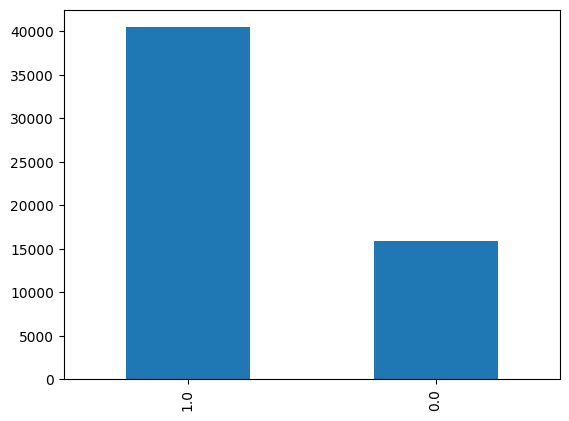

In [9]:
train_data['label'].value_counts().plot(kind = 'bar')

In [10]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0    0.0  15925
1    1.0  40481


### 4. Okt를 사용하여 토큰화 작업 수행

In [12]:
okt = Okt() 

train_data['tokenized'] = train_data['리뷰'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x])
test_data['tokenized'] = test_data['리뷰'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x])

### 5. 단어와 길이 분포 확인하기

In [13]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [14]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))      # 부정 리뷰에 대해서 빈도수가 높은 상위 20개 단어들을 출력

[('이', 8122), ('영화', 5812), ('의', 4738), ('가', 4555), ('을', 3901), ('에', 3729), ('은', 3168), ('들', 3006), ('는', 2970), ('도', 2556), ('를', 2539), ('한', 2088), ('다', 1683), ('너무', 1453), ('것', 1364), ('적', 1325), ('으로', 1268), ('만', 1249), ('게', 1239), ('과', 1190)]


In [15]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))      # 긍정 리뷰에 대해서 빈도수가 높은 상위 20개 단어들을 출력

[('이', 17194), ('영화', 16238), ('의', 12540), ('을', 9082), ('가', 9051), ('에', 8620), ('들', 6858), ('도', 6156), ('를', 6146), ('는', 5980), ('은', 5917), ('다', 4532), ('한', 4460), ('너무', 4338), ('적', 3622), ('최고', 3473), ('잘', 3311), ('연기', 3231), ('과', 3106), ('에서', 2918)]


긍정 리뷰의 평균 길이 : 15.729996788616882
부정 리뷰의 평균 길이 : 16.80734693877551


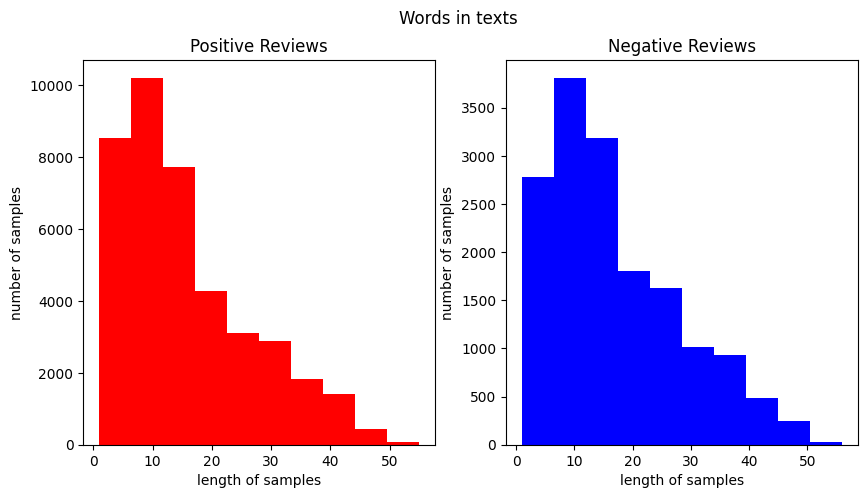

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [17]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [18]:
test_data

,영화,리뷰,평점,site,okt_review,okt_details,okt_polarity,label,tokenized
11630,아이언맨 3,위기를 극복하고자아를 찾는 토니 스타크의 모습은 잘 표현했지만 연출이나 설정 조연 ...,7.0,naver,"[('위기', 'Noun'), ('를', 'Josa'), ('극복', 'Noun')...","[[2, [('극복', 'Noun'), ('하고', 'Josa')], 1.0], [...",-3.0,0.0,"[위기, 를, 극복, 하고, 자아, 를, 찾는, 토니, 스타크, 의, 모습, 은, ..."
19464,한산: 용의 출현,초등학생 중 학생 방학 때 보면 좋을 영화입니다 교육적으로,8.0,naver,"[('초등학생', 'Noun'), ('중', 'Noun'), ('학생', 'Noun...","[[5, [('보다', 'Verb')], 1.0], [6, [('좋다', 'Adje...",4.0,1.0,"[초등학생, 중, 학생, 방학, 때, 보면, 좋을, 영화, 입니다, 교육, 적, 으로]"
24443,곡성,다들 막장이라고 하지완전 탄탄한데 보는 내내 기분 나쁜 거 영화 중 최고였음성공 아...,10.0,naver,"[('다', 'Adverb'), ('들다', 'Verb'), ('막장', 'Noun...","[[2, [('막장', 'Noun')], -1.0], [6, [('탄탄하다', 'A...",4.0,1.0,"[다, 들, 막장, 이라고, 하지, 완전, 탄탄한데, 보는, 내내, 기분, 나쁜, ..."
49521,트랜스포머 3,먼저 여주인공이 더 잘 어울렸는 ㄷ 내용이 끈어진 듯 싶고 끈어진 필름을 보는 듯했...,5.0,daum,"[('먼저', 'Noun'), ('여', 'Modifier'), ('주인공', 'N...","[[28, [('때', 'Noun'), ('가', 'Josa')], -1.0], [...",8.0,1.0,"[먼저, 여, 주인공, 이, 더, 잘, 어울렸는, ㄷ, 내용, 이, 끈어진, 듯, ..."
58172,아저씨,다시 봐도 좋아요,9.0,daum,"[('다시', 'Noun'), ('보다', 'Verb'), ('좋다', 'Adjec...","[[1, [('보다', 'Verb')], 1.0], [2, [('좋다', 'Adje...",4.0,1.0,"[다시, 봐도, 좋아요]"
...,...,...,...,...,...,...,...,...,...
74625,어벤져스: 에이지 오브 울트론,빛 좋은 개살구 예고편이 편집을 기가 막히게 잘한 거였구나 제대로 낚였어 완성된 영...,5.0,watcha,"[('빛', 'Noun'), ('좋다', 'Adjective'), ('개살구', '...","[[0, [('빛', 'Noun')], 1.0], [1, [('좋다', 'Adjec...",-1.0,0.0,"[빛, 좋은, 개살구, 예고편, 이, 편집, 을, 기, 가, 막히게, 잘한, 거, ..."
11072,설국열차,10점 만점에 10점,10.0,naver,"[('10', 'Number'), ('점', 'Noun'), ('만점', 'Noun...","[[2, [('만점', 'Noun')], 1.0]]",1.0,1.0,"[10, 점, 만점, 에, 10, 점]"
42368,신과함께-인과 연,는 어설프 다 쳐도 감동과 반전이 적재적소,8.0,daum,"[('늘다', 'Verb'), ('어설프다', 'Adjective'), ('다', ...","[[1, [('어설프다', 'Adjective')], -1.0], [4, [('감동...",2.0,1.0,"[는, 어설프, 다, 쳐도, 감동, 과, 반전, 이, 적재적소]"
14477,국가대표,그래마 자 김동욱 나온 영화였지 이제야 다시 보네ㅎㅎ,10.0,naver,"[('그렇다', 'Adjective'), ('자', 'Noun'), ('김동욱', ...","[[8, [('보다', 'Verb')], 1.0]]",1.0,1.0,"[그래마, 자, 김동욱, 나온, 영화, 였지, 이제야, 다시, 보네, ㅎㅎ]"


### 6. 정수 인코딩

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [20]:
threshold = 2
total_cnt = len(tokenizer.word_index)    # 단어의 수
rare_cnt = 0         # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0       # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0        # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 53584
등장 빈도가 1번 이하인 희귀 단어의 수: 28535
단어 집합에서 희귀 단어의 비율: 53.25283666766198
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.155050236449095


In [21]:
# 전체 단어 개수 중 빈도수 1이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 25051


In [22]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [23]:
print(X_train[:3])  # 잘되었는지 체크

[[969, 3, 435, 38, 43, 1137, 10, 129, 43, 41, 5419], [157, 7, 194, 2144, 2, 1382, 494, 7, 33, 3397, 1, 42, 3], [1276, 1774, 1107, 26, 321, 13, 1600, 75, 2, 1471, 70, 17, 15, 28, 4338]]


### 7. 패딩

리뷰의 최대 길이 : 56
리뷰의 평균 길이 : 16.034163032301528


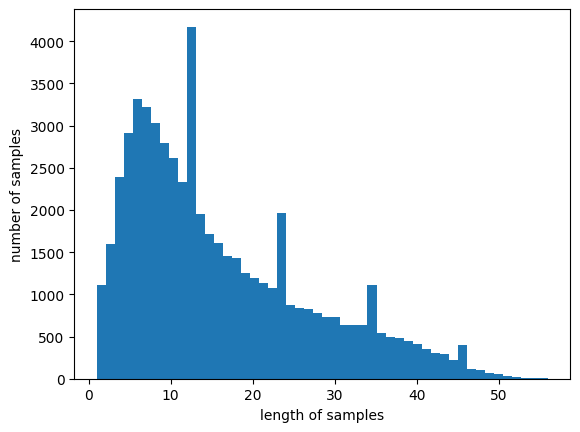

In [24]:
print('리뷰의 최대 길이 :', max(len(review) for review in X_train))
print('리뷰의 평균 길이 :', sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
# 길이가 max_len 이하의 샘플 비율 알아보는 함수
def below_threshold_len(max_len, dataset):
    count = 0
    for sentence in dataset:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(dataset))*100))

In [26]:
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 100.0


In [27]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Bi-LSTM으로 영화 리뷰 감성 분류 

생성된 시퀀스 데이터를 학습하기 위해 **양방향 LSTM**계층을 정의한 후 **모델을 생성**하는 부분
* LSTM 계층을 양방향으로 설정하기 위해 `Bidirectional 래퍼(wrapper)` 사용

### 양방향 LSTM 모델 설정시 주의할 점
* 정방향, 역방향 LSTM 계층에 모든 출력값을 연결해야 하기 때문에 `return_sequences`인자를 반드시 설정해야 함
* Dense 계층을 `TimeDistributed` 래퍼를 사용해 `3차원 텐서`를 입력받을 수 있게 확장해야 함

In [148]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_len))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))    # Bidirectional LSTM을 사용
model.add(TimeDistributed(Dense(1, activation='sigmoid')))   # TimeDistributed로 각 스텝마다 cost(오류)를 계산해서 하위 스텝으로 오류를 전파하여 각 weight를 업데이트

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('./data/BiLSTM_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)  # val_accuracy가 최대인 지점, 가장 좋은값으로 저장

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/15
177/177 [==============================] - ETA: 0s - loss: 0.6009 - accuracy: 0.7147
Epoch 1: val_accuracy improved from -inf to 0.72062, saving model to ./data\BiLSTM_model.h5
177/177 [==============================] - 153s 846ms/step - loss: 0.6009 - accuracy: 0.7147 - val_loss: 0.5939 - val_accuracy: 0.7206
Epoch 2/15
177/177 [==============================] - ETA: 0s - loss: 0.5971 - accuracy: 0.7169
Epoch 2: val_accuracy did not improve from 0.72062
177/177 [==============================] - 154s 868ms/step - loss: 0.5971 - accuracy: 0.7169 - val_loss: 0.5938 - val_accuracy: 0.7206
Epoch 3/15
177/177 [==============================] - ETA: 0s - loss: 0.5970 - accuracy: 0.7169
Epoch 3: val_accuracy did not improve from 0.72062
177/177 [==============================] - 155s 876ms/step - loss: 0.5970 - accuracy: 0.7169 - val_loss: 0.5930 - val_accuracy: 0.7206
Epoch 4/15
177/177 [==============================] - ETA: 0s - loss: 0.5965 - accuracy: 0.7169
Epoch 4: val_accu

In [152]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 60, 128)           3206528   
                                                                 
 dropout_5 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 3,338,241
Trainable params: 3,338,241
Non-trainable params: 0
_________________________________________________________________


In [33]:
loaded_model = load_model('./data/BiLSTM_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

588/588 [==============================] - 14s 22ms/step - loss: 0.5967 - accuracy: 0.7172
테스트 정확도: 0.7172


In [ ]:
sentiment_predict('이 영화 진짜 재미없다....노잼')

# LSTM으로 영화 리뷰 감성 분류

In [31]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, TimeDistributed, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_len))
model.add(Dropout(0.5))
model.add(LSTM(hidden_units))   
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('./data/LSTM_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)  # val_accuracy가 최대인 지점, 가장 좋은값으로 저장

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 60, 128)           3206528   
                                                                 
 dropout_1 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,338,241
Trainable params: 3,338,241
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/15
112/177 [=================>............] - ETA: 13s - loss: 0.4953 - accuracy: 0.7596

KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
loaded_model = load_model('./data/LSTM_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

# CNN으로 영화 리뷰 감성 분류

In [121]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 128
dropout_ratio = (0.5, 0.8)
num_filters = 128
hidden_units = 128

In [122]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z)

In [123]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

In [124]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)
z = Dense(hidden_units, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('./data/CNN_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)     # val_accuracy가 최대인 지점, 가장 좋은값으로 저장

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=2, callbacks=[es, mc])

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.90631, saving model to ./data\CNN_model.h5
706/706 - 63s - loss: 0.4098 - accuracy: 0.8101 - val_loss: 0.2349 - val_accuracy: 0.9063 - 63s/epoch - 89ms/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.90631 to 0.92209, saving model to ./data\CNN_model.h5
706/706 - 61s - loss: 0.1956 - accuracy: 0.9233 - val_loss: 0.1907 - val_accuracy: 0.9221 - 61s/epoch - 86ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.92209
706/706 - 59s - loss: 0.1211 - accuracy: 0.9539 - val_loss: 0.1936 - val_accuracy: 0.9218 - 59s/epoch - 84ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.92209
706/706 - 62s - loss: 0.0865 - accuracy: 0.9674 - val_loss: 0.2095 - val_accuracy: 0.9214 - 62s/epoch - 88ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.92209
706/706 - 61s - loss: 0.0658 - accuracy: 0.9751 - val_loss: 0.2266 - val_accuracy: 0.9214 - 61s/epoch - 87ms/step
Epoch 6/10

Epoch 6: val_accuracy di

In [125]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 60, 128)      3206528     ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 60, 128)      0           ['embedding[0][0]']              
                                                                                                  
 conv1d (Conv1D)                (None, 58, 128)      49280       ['dropout[0][0]']                
                                                                                              

In [34]:
loaded_model = load_model('./data/CNN_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

588/588 [==============================] - 4s 7ms/step - loss: 0.2023 - accuracy: 0.9184

 테스트 정확도: 0.9184


# 새로운 리뷰 예측

### 불용어 사전 불러오기

In [36]:
stop_df = pd.read_table('./data/stopwords-ko.txt')
stopwords = stop_df['가'].tolist()
stopwords

['가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',
 '더구나'

### 새로운 텍스트 예측

In [37]:
from pykospacing import Spacing

In [38]:
def sentiment_predict(new_sentence, remove_stopwords=True):    # 불용어 제거 : option 
    # 1. 한글, 숫자가 아닌 특수문자들을 공백(" ")으로 바꾸기
    new_sentence = re.sub('[^ㄱ-ㅎ가-힣0-9]',' ', new_sentence)
    
    # 2. 공백단위로 텍스트들 나눠서 리스트로 만든다.
    new_sentence = new_sentence.split()    
    
    # 3. 불용어들을 제거
    new_sentence = [word for word in new_sentence if not word in stopwords]
    
    # 4. 단어 리스트를 공백을 넣어서 하나의 글로 합친다.
    new_sentence = ' '.join(new_sentence)
    
    # 5. 올바른 띄어쓰기 만들기
    spacing = Spacing()
    
    # 띄어쓰기 없애기
    new_sentence = new_sentence.replace(" ", "")

    # 띄어쓰기 변환
    new_sentence = spacing(new_sentence)
    
    # 6. 토큰화
    new_sentence = okt.morphs(new_sentence) 
    
    # 7. 정수 인코딩
    encoded = tokenizer.texts_to_sequences([new_sentence])
    
    # 8. 패딩
    pad_new = pad_sequences(encoded, maxlen = max_len)
    
    # 9. 예측
    score = float(loaded_model.predict(pad_new))
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [42]:
sentiment_predict('세시간동안 전혀 지루함 못 느낌. 서사, 볼거리, 메시지 등 다 최고입니다')

1/1 [==============================] - 0s 15ms/step
98.07% 확률로 긍정 리뷰입니다.


In [43]:
sentiment_predict('기대가 컷던탓인지 눈은즐거웟으나스토리가 아쉬움')

1/1 [==============================] - 0s 16ms/step
92.67% 확률로 부정 리뷰입니다.


In [44]:
sentiment_predict('연기력이 살린 영화 담아내려는 스토리가 너무 많았던것같아요')

1/1 [==============================] - 0s 16ms/step
95.77% 확률로 긍정 리뷰입니다.


In [45]:
sentiment_predict('개별로임 영화 개노잼 그냥 돈아까움 볼 가치가 없는 영화임')

1/1 [==============================] - 0s 16ms/step
99.97% 확률로 부정 리뷰입니다.
